In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib
from tensorflow import keras

In [31]:
import kagglehub

path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")

print("Path to dataset files:", path)

Path to dataset files: /Users/siddheshsongirkar/.cache/kagglehub/datasets/jsphyg/weather-dataset-rattle-package/versions/2


In [32]:
weather_df = pd.read_csv('/Users/siddheshsongirkar/.cache/kagglehub/datasets/jsphyg/weather-dataset-rattle-package/versions/2/weatherAUS.csv')


In [33]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [34]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [35]:
weather_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [39]:
weather_df = weather_df.drop(columns = 'Date')

In [40]:
weather_df = weather_df[~weather_df['RainTomorrow'].isna()]

In [41]:
weather_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [42]:
y = (weather_df['RainTomorrow'] == 'Yes').astype(int) ### Convert last column into label
weather_df = weather_df.drop(columns = 'RainTomorrow')

In [43]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 142193, dtype: int64

In [44]:
column_dtypes = weather_df.dtypes
categorical_columns = column_dtypes[column_dtypes == 'object'].index.to_list()
numerical_columns = column_dtypes[column_dtypes != 'object'].index.to_list()

In [45]:
def mode_impute(df):
    mode = df.mode().iloc[0]
    df = df.fillna(mode)
    
    return df

In [46]:
def median_impute(df):
    median = df.median()
    df = df.fillna(median)
    
    return df

In [47]:
mode_impute(weather_df[categorical_columns]).isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [48]:
median_impute(weather_df[numerical_columns]).isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

<Axes: xlabel='RainTomorrow'>

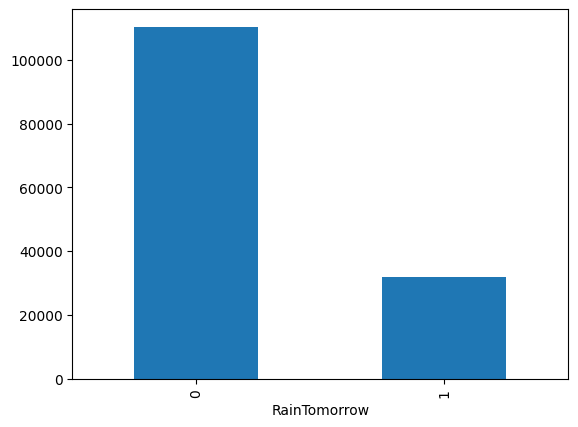

In [49]:
y.value_counts().plot.bar()

One Hot Encode Categorical Columns¶

Categorical data can't be used in deep learning directly since models only accept numbers. For the case of data that can be boiled down to True or False we can replace True values with 1 and False values with 0. For the case of categorical data with more than 2 values it can take on for example a columns that can take on the values of red blue and green we can seperate each columns into red present, blue present, and green present, turning into 3 different binary cases and converting it into its numerical representation.

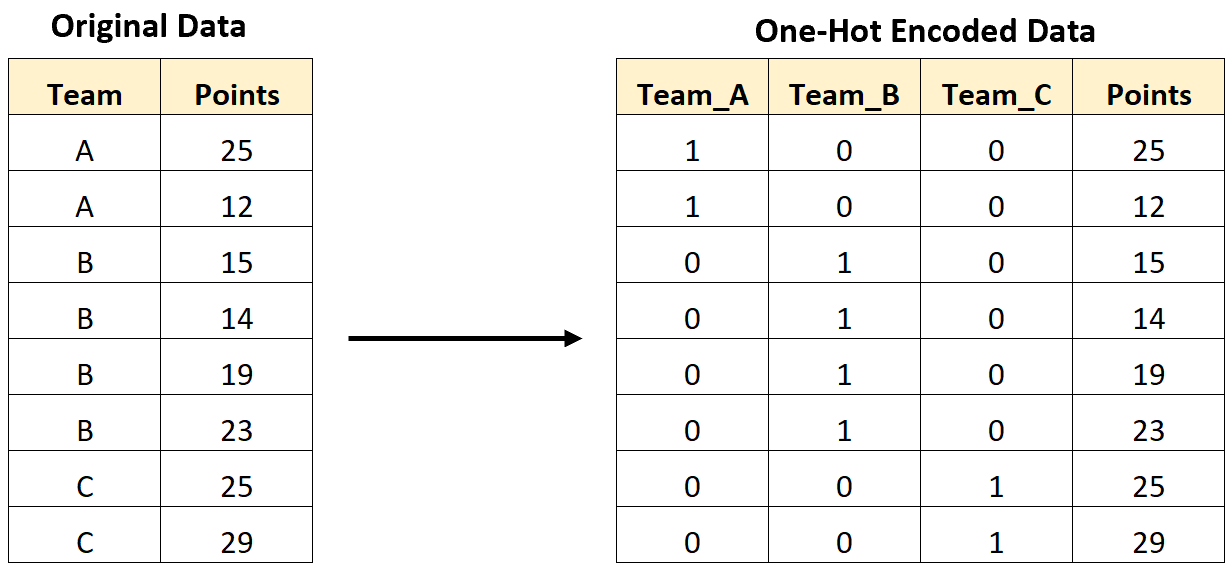

In [50]:
def one_hot_encode(df):
    return pd.get_dummies(df[categorical_columns]).astype(int)

In [51]:
def normalize(df):
    return (df - df.mean())/df.std()

In [52]:
def create_df(df):
    categorical_data = df[categorical_columns]
    numerical_data = df[numerical_columns]

    categorical_data = mode_impute(categorical_data)
    numerical_data = median_impute(numerical_data)

    categorical_data = one_hot_encode(categorical_data)
    numerical_data = normalize(numerical_data)

    fullDF = pd.concat([categorical_data, numerical_data], axis = 1)
    return fullDF

In [53]:
X = create_df(weather_df)

In [54]:
X

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0,0,1,0,0,0,0,0,0,0,...,0.678691,0.614069,0.113126,-1.436558,-1.474661,-1.220101,1.460292,0.140338,-0.013238,0.018050
1,0,0,1,0,0,0,0,0,0,0,...,-1.128889,0.384756,-1.312992,-1.290447,-1.044794,-1.115339,0.152737,0.140338,0.033114,0.381885
2,0,0,1,0,0,0,0,0,0,0,...,0.565717,0.843383,-1.629907,-1.046927,-1.489484,-0.980645,0.152737,-1.275589,0.620240,0.221797
3,0,0,1,0,0,0,0,0,0,0,...,-0.338073,-1.105781,-1.260173,-1.728782,-0.007183,-0.367038,0.152737,0.140338,0.172170,0.702060
4,0,0,1,0,0,0,0,0,0,0,...,-0.789968,0.155442,0.694137,-0.900815,-1.015148,-1.384727,1.024440,1.556265,0.125818,1.167769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,...,0.113822,-0.647154,-0.520704,-1.193039,1.045251,0.890106,0.152737,0.140338,-1.172039,-0.112931
145455,0,0,0,0,0,0,0,0,0,0,...,-0.112125,-0.876468,-0.943258,-1.339150,1.030428,0.755412,0.152737,0.140338,-1.063885,0.105370
145456,0,0,0,0,0,0,0,0,0,0,...,-0.112125,-1.105781,-0.679162,-1.485262,0.867374,0.575820,0.152737,0.140338,-0.940279,0.410992
145457,0,0,0,0,0,0,0,0,0,0,...,-0.564020,-1.105781,-0.837619,-1.339150,0.496799,0.231602,0.152737,0.140338,-0.693068,0.643846


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

In [57]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((127973, 115), (14220, 115), (127973,), (14220,))

In [69]:
X.shape

(142193, 115)

## Creating the Model: ##

In [70]:
def create_model():
    model = keras.Sequential([keras.layers.Input(shape = (X.shape[1],)),
                              keras.layers.Dense(256, activation = 'gelu'),
                              keras.layers.Dropout(0.25),
                              keras.layers.Dense(128, activation = 'gelu'),
                              keras.layers.Dropout(0.5),
                              keras.layers.Dense(64, activation = 'gelu'),
                              keras.layers.Dropout(0.5),
                              keras.layers.Dense(1, activation = 'sigmoid')
                             ])
    optimizer = keras.optimizers.AdamW(learning_rate = 3e-3, weight_decay = 1e-1)
    loss = keras.losses.BinaryCrossentropy(label_smoothing = 1e-1)

    model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy', keras.metrics.AUC(curve = 'pr')])

    return model
                              

In [73]:
create_model().summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 256)            │        29,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,913 (277.00 KB)

 Trainable params: 70,913 (277.00 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

EPOCHS = 100
model = create_model()

initial_lr = 5e-5
warmup_target = 3e-3
warmup_epochs = EPOCHS // 10
decay_epochs = EPOCHS - warmup_epochs

# CosineDecay instance for post-warmup phase
cosine_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=warmup_target,
    decay_steps=decay_epochs
)

# Custom scheduler that includes warmup
def lr_fn(epoch):
    if epoch < warmup_epochs:
        # Linear warmup from initial_lr to warmup_target
        return float(initial_lr + (warmup_target - initial_lr) * (epoch / warmup_epochs))
    else:
        # Cosine decay from warmup_target
        return float(cosine_schedule(epoch - warmup_epochs))

lr_schedule = keras.callbacks.LearningRateScheduler(lr_fn)

history = model.fit(x = X_train, y = y_train, batch_size = 32, validation_data = (X_val, y_val), epochs = EPOCHS, callbacks = [lr_schedule])

Epoch 1/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8043 - auc_12: 0.5804 - loss: 0.5072 - val_accuracy: 0.8459 - val_auc_12: 0.7007 - val_loss: 0.4341 - learning_rate: 5.0000e-05
Epoch 2/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8453 - auc_12: 0.6887 - loss: 0.4422 - val_accuracy: 0.8518 - val_auc_12: 0.7290 - val_loss: 0.4239 - learning_rate: 3.4500e-04
Epoch 3/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8517 - auc_12: 0.7077 - loss: 0.4310 - val_accuracy: 0.8560 - val_auc_12: 0.7363 - val_loss: 0.4204 - learning_rate: 6.4000e-04
Epoch 4/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8535 - auc_12: 0.7198 - loss: 0.4290 - val_accuracy: 0.8571 - val_auc_12: 0.7407 - val_loss: 0.4176 - learning_rate: 9.3500e-04
Epoch 5/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8548 - auc_12: 0.7199 - loss: 0.4267 - val_accuracy: 0.8577 - val_auc_12: 0.7383 - val_loss: 0.4188 - learning_rate: 0.0012
Epoch 6/100
4000/40

In [92]:
training_df = pd.DataFrame(history.history)

<Axes: >

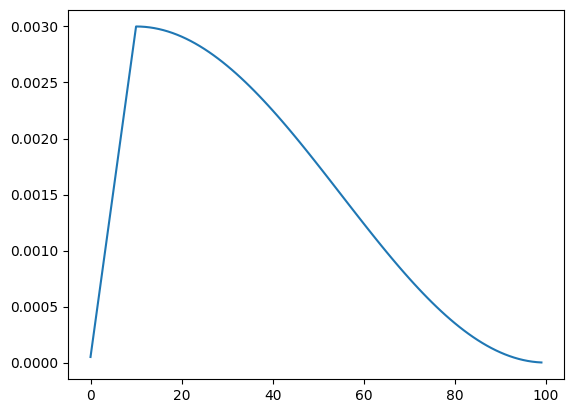

In [93]:
training_df['learning_rate'].plot()

<Axes: >

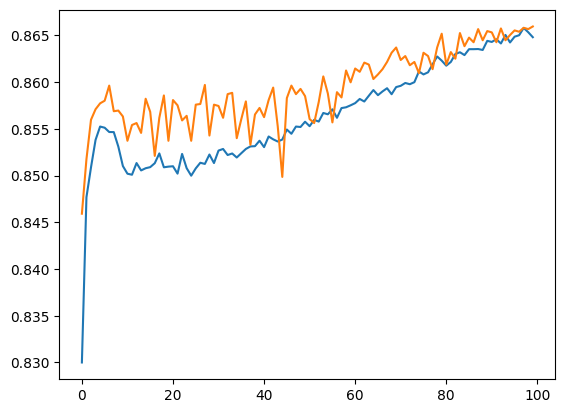

In [94]:
training_df['accuracy'].plot()
training_df['val_accuracy'].plot()

<Axes: >

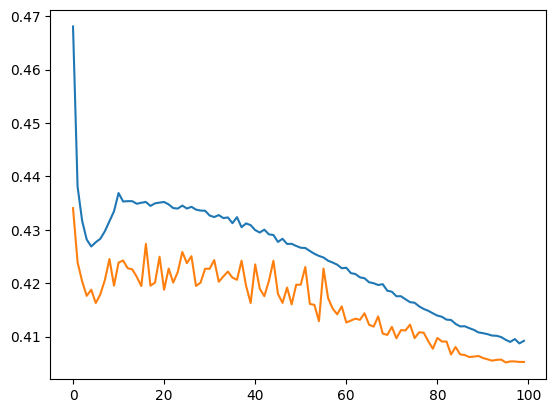

In [95]:
training_df['loss'].plot()
training_df['val_loss'].plot()

In [96]:
model.evaluate(X_val, y_val)

445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8621 - auc_12: 0.7628 - loss: 0.4102


[0.4052439332008362, 0.8659634590148926, 0.7672382593154907]